<h1><center>Lead Soring Case Study</center></h1>

### Part : 1 
Importing And Analysing Raw Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 500)

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [46]:
df.shape

(9074, 22)

In [45]:
df['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

As we can see the data we have contains approx 62% 0's and 38% 1's

### Part 2: Cleaning 

Missing value Treatment

Total number of missing values in the Dataframe are as follows

In [4]:
(df.isna().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

We have taken a decision to remove columns having high percentage of missing values. we could have treated maximum 10% of missing values. Taking more into account will result in the creation of fake data.

Our thought process was that if don’t get a better model by removing these many columns, then we will try to use techniques like Mean, Median, Mode or random to fill the values

The above is a percentage of missing values. it is either very high or very low

Removing columns with high missing percentage

In [5]:
list_to_drop = ['Country','Specialization','How did you hear about X Education',
               'What is your current occupation','What matters most to you in choosing a course',
               'Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                'Asymmetrique Activity Score','Asymmetrique Profile Score']
df.drop(list_to_drop,axis=1,inplace=True)
(df.isna().sum()/len(df))*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

Since the missing values are not very high and are approx 1.5% we will simply remove the rows 

Removing rows with missing values

In [6]:
df.dropna(inplace=True)
len(df)

9074

In [7]:
(df.isna().sum()/len(df))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

Now the data is cleaned and we can proceed with dummy variables

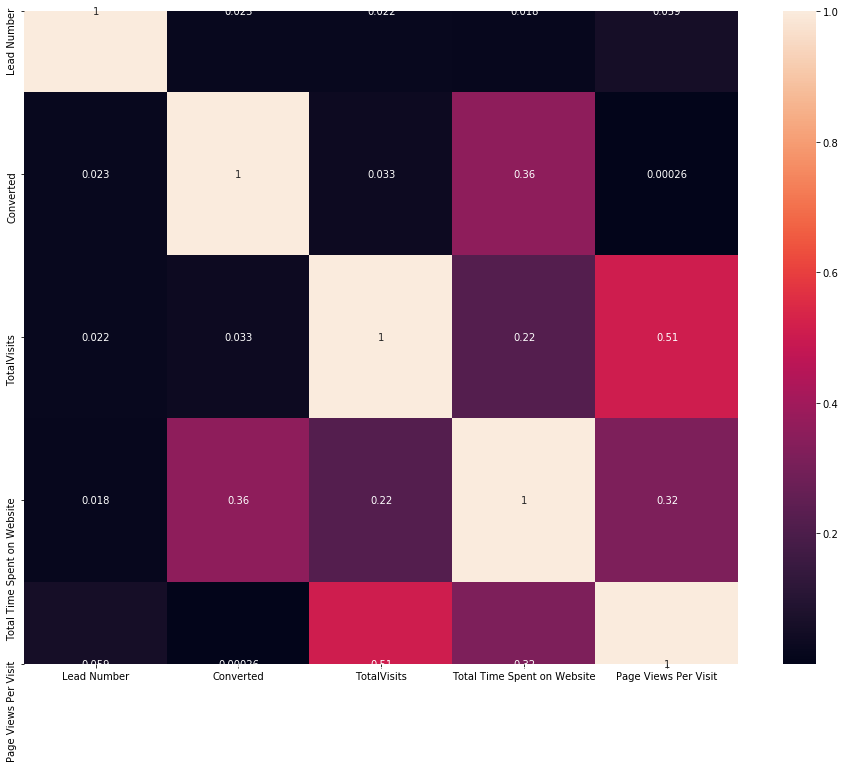

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

Converting categorical variables to numerical variables

Initially taking Yes and No

Mapping 'Yes' and 'No' with 0 and 1

In [9]:
list_to_map =['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
              'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
              'Receive More Updates About Our Courses','Update me on Supply Chain Content',
              'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
dict_to_map = {
    'Yes':1,
    'No':0
}
for li in list_to_map:
    df[li] = df[li].map(dict_to_map)

In [10]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified


The first 2 columns 'Prospect ID', 'Lead Number' are just reference columns and have no use in classification.
Therefore removing them

In [11]:
list_drop_2 = [ 'Prospect ID', 'Lead Number']
df.drop(list_drop_2,axis=1,inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified


Now converting categorical columns to dummy variables

In [12]:
df2 =df
list_convert_dummies =['Lead Origin','Lead Source','Last Activity','Last Notable Activity']
#pd.get_dummies(s1, dummy_na=True,drop_first=False)

for li in list_convert_dummies:
    dum = pd.get_dummies(df[li], drop_first=True)
    df2 = pd.concat([df2,dum],axis=1)

df2.drop(list_convert_dummies,axis=1, inplace=True)
df2.head()


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Converting data into Train, Test split

In [13]:
df_train, df_test = train_test_split(df2,test_size=0.2, random_state=0)

Applying standard scaller

In [14]:
#reindex df_train

In [15]:
list_to_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
df_train[list_to_scale] = scaler.fit_transform(df_train[list_to_scale])
df_train.head()

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
5509,0,0,1,1.112155,1.654146,0.992572,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7746,0,0,0,0.510027,-0.568321,0.295664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8263,0,0,0,-0.292811,-0.636169,-0.168941,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4559,0,0,1,0.108608,0.707947,0.760270,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7959,0,0,1,0.510027,0.500737,0.295664,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Taking a look at Outliers

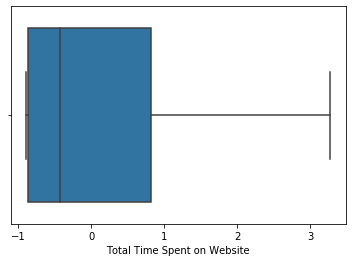

In [16]:
sns.boxplot(df_train['Total Time Spent on Website'])

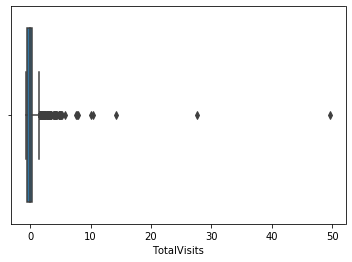

In [17]:
sns.boxplot(df_train['TotalVisits'])

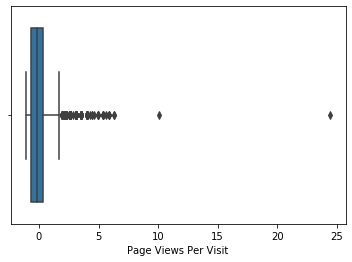

In [18]:
sns.boxplot(df_train['Page Views Per Visit'])

There is no much data spread except a few points which are lying outside the scope, therefore we are deciding not to remove outliers

In [47]:
df_train.shape

(7259, 71)

Since we have 71 columns to analyse the best possible solution is to use PCA

### Part-3
Applying PCA

In [19]:
y_train = df_train.pop('Converted')
X_train = df_train
pca = PCA(svd_solver='randomized', random_state=0)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=False)

In [20]:
pca.components_

array([[ 4.28037048e-03, -2.77442779e-05,  5.40870447e-01, ...,
         4.78266069e-04,  7.27362671e-04,  1.98886698e-05],
       [ 2.28097920e-02, -8.49950693e-05,  5.11383459e-01, ...,
         7.64680313e-05,  1.18968224e-03,  1.73758522e-04],
       [ 6.14426735e-02,  3.35842619e-05,  1.53419396e-01, ...,
         5.96394887e-04,  1.29383204e-03,  6.69439589e-05],
       ...,
       [ 0.00000000e+00,  2.34538946e-17,  5.92899009e-18, ...,
        -6.93889390e-17, -1.58293517e-16,  7.54604712e-17],
       [ 0.00000000e+00, -1.97843942e-18,  3.27611576e-19, ...,
         2.77555756e-17,  1.63064007e-16,  6.85215773e-17],
       [ 0.00000000e+00, -1.03845528e-16,  3.13174895e-17, ...,
        -7.21991911e-15, -1.01307851e-15, -4.71844785e-16]])

In [21]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X_train.columns})
pcs_df.head()

,PC1,PC2,Feature
0,0.004280,0.022810,Do Not Email
1,-0.000028,-0.000085,Do Not Call
2,0.540870,0.511383,TotalVisits
3,0.456636,-0.806056,Total Time Spent on Website
4,0.612774,0.192360,Page Views Per Visit


In [44]:
pcs_df

,PC1,PC2,Feature
0,4.280370e-03,2.280979e-02,Do Not Email
1,-2.774428e-05,-8.499507e-05,Do Not Call
2,5.408704e-01,5.113835e-01,TotalVisits
3,4.566364e-01,-8.060558e-01,Total Time Spent on Website
4,6.127737e-01,1.923597e-01,Page Views Per Visit
5,1.056834e-03,1.116755e-03,Search
6,4.336809e-19,-2.775558e-17,Magazine
7,3.850938e-04,3.064003e-04,Newspaper Article
8,1.685618e-04,2.171913e-04,X Education Forums
9,0.000000e+00,4.336809e-19,Newspaper


The above table shows all the principal components. For better Reference we will take a look at first 2 principal components for the columns

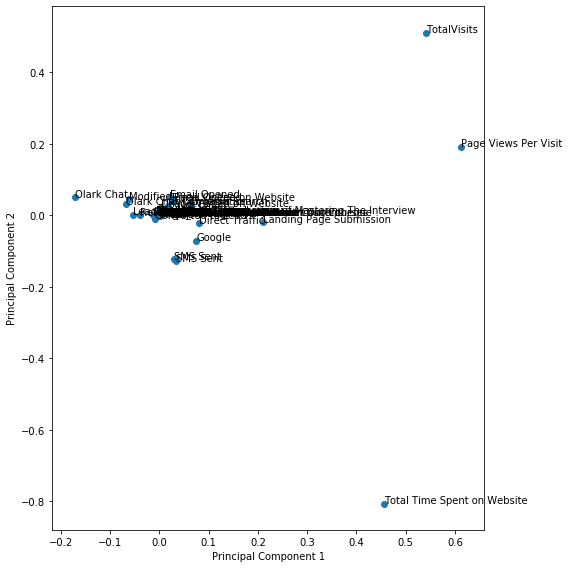

In [22]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

As we can see columns (Total visits), (page views per visit) and (Total time spent on website) are having more influence

Looking at the screeplot to assess the number of needed principal components

In [23]:
pca.explained_variance_ratio_

array([3.25356877e-01, 1.42982023e-01, 1.00125142e-01, 8.98960896e-02,
       7.50241027e-02, 6.61540120e-02, 3.87738658e-02, 2.42097862e-02,
       1.97696898e-02, 1.88726097e-02, 1.53029479e-02, 1.27471532e-02,
       1.19237434e-02, 1.05480559e-02, 9.12379886e-03, 6.70694794e-03,
       5.20732478e-03, 3.75724023e-03, 3.42038534e-03, 3.18336655e-03,
       2.80736028e-03, 2.52712799e-03, 2.35673222e-03, 1.93528522e-03,
       1.53373608e-03, 1.16609479e-03, 1.02790651e-03, 7.89992375e-04,
       6.51981648e-04, 3.51887830e-04, 2.45472060e-04, 1.64564403e-04,
       1.50876976e-04, 1.33266795e-04, 1.03522314e-04, 1.02646684e-04,
       8.96354162e-05, 8.49989190e-05, 7.39603818e-05, 6.70647668e-05,
       5.84554914e-05, 5.50315193e-05, 5.00844850e-05, 4.70727724e-05,
       3.73277949e-05, 3.27258491e-05, 2.59209466e-05, 2.36292274e-05,
       2.36268798e-05, 2.36249936e-05, 2.36175047e-05, 2.35381890e-05,
       2.34444770e-05, 2.29659314e-05, 2.08501364e-05, 1.99363151e-05,
      

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32535688, 0.4683389 , 0.56846404, 0.65836013, 0.73338423,
       0.79953825, 0.83831211, 0.8625219 , 0.88229159, 0.9011642 ,
       0.91646715, 0.9292143 , 0.94113804, 0.9516861 , 0.9608099 ,
       0.96751684, 0.97272417, 0.97648141, 0.9799018 , 0.98308516,
       0.98589252, 0.98841965, 0.99077638, 0.99271167, 0.9942454 ,
       0.9954115 , 0.9964394 , 0.9972294 , 0.99788138, 0.99823327,
       0.99847874, 0.9986433 , 0.99879418, 0.99892745, 0.99903097,
       0.99913362, 0.99922325, 0.99930825, 0.99938221, 0.99944928,
       0.99950773, 0.99956276, 0.99961285, 0.99965992, 0.99969725,
       0.99972997, 0.99975589, 0.99977952, 0.99980315, 0.99982678,
       0.99985039, 0.99987393, 0.99989738, 0.99992034, 0.99994119,
       0.99996113, 0.99997303, 0.99998307, 0.99999049, 0.99999734,
       0.99999873, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

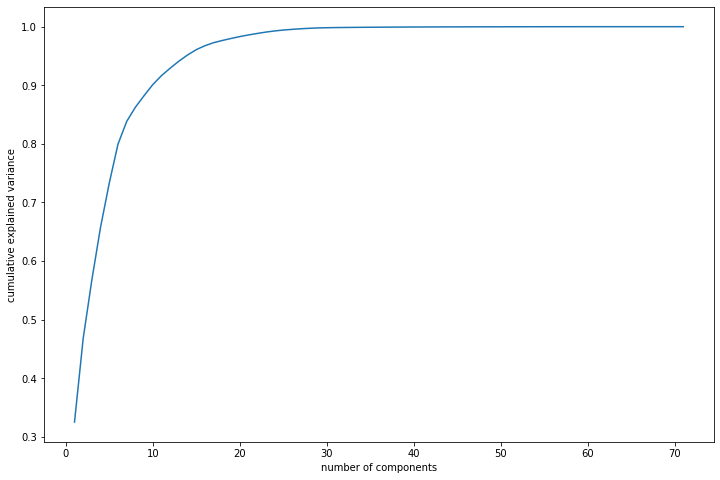

In [25]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(range(1,72),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see from the scree plot above , at around 10 variables we are able to explain 90 % variance of the data

Therefore we will take 10 components to create the model

In [26]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [27]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(7259, 10)

So lets see the correlation heatmap of the components

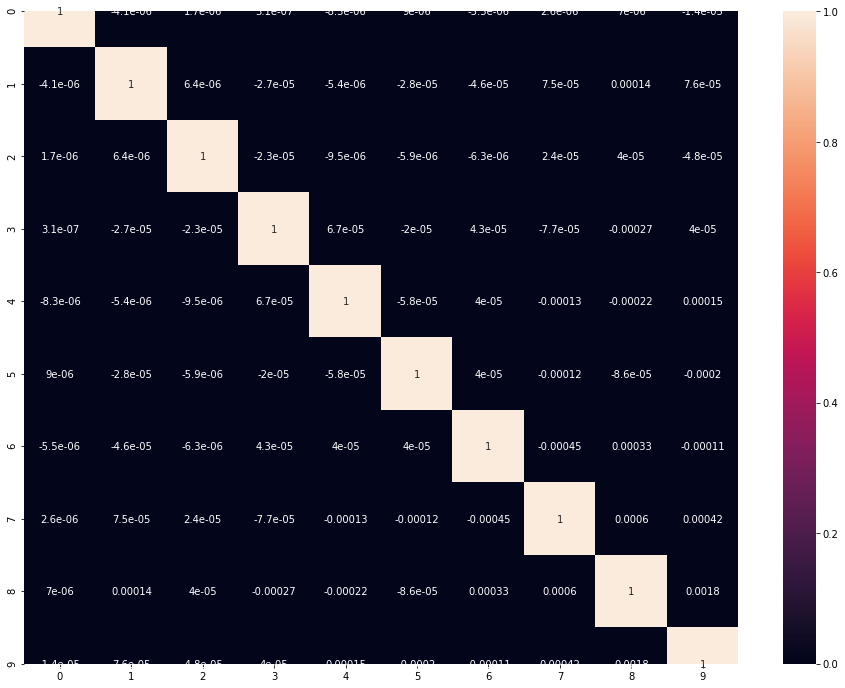

In [28]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (16,12))
sns.heatmap(corrmat,annot = True)

Let us also see the maximum and minimum correlation in the above table as follows

In [29]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0018093610194398447 , min corr:  -0.00044504733137256476


Let see how our data is spread using principal components

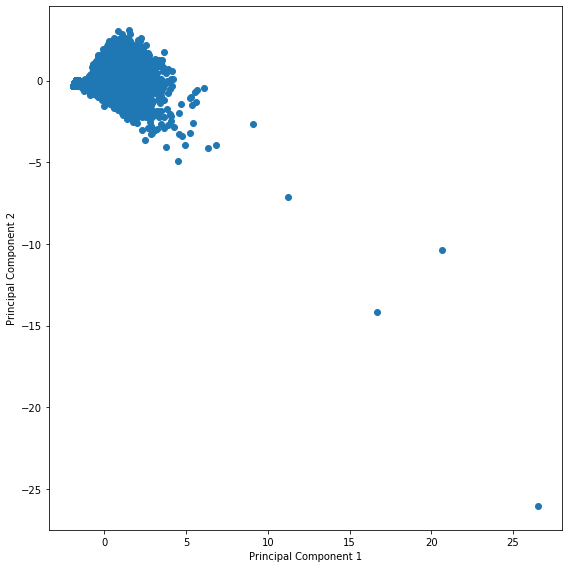

In [30]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

As we can see most our data is clustered together, but a few are lying outside

Part 4: Logistic regression

Now we will create our logistic regression model from the data

In [32]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train_pca,y_train)


c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

lets predict how model perform on train dataset

In [33]:
train_pred = lrmodel.predict(X_train_pca)

Now our model has predicted values of train dataset

In [34]:
accuracy_score = metrics.accuracy_score(y_train, train_pred)
precision_score = metrics.precision_score(y_train, train_pred)
recall_score = metrics.recall_score(y_train, train_pred)
f1_score = metrics.f1_score(y_train, train_pred)

# print(accuracy_score, precision_score, recall_score, f1_score)


# write the scores into the output file as a dictionary
# this code is already written for you
d = {'recall_score': recall_score,
    'f1_score': f1_score,
    'accuracy_score': accuracy_score,
	'precision_score': precision_score}
for key,val in d.items():
    print(key,'  :  ',val)


recall_score   :   0.67296045600285
f1_score   :   0.7072257581430177
accuracy_score   :   0.7845433255269321
precision_score   :   0.7451676528599606


Now lets see how model perform on Test dataset

Applying standardisation and PCA on test dataset

In [35]:
df_test[list_to_scale] = scaler.transform(df_test[list_to_scale])
df_test.head()

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
3374,0,0,0,0.510027,-0.779199,0.295664,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4262,0,0,0,-0.694229,-0.894723,-1.098152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7855,0,0,0,-0.092101,-0.742525,0.295664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3017,0,0,1,0.108608,1.256229,0.760270,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
560,0,0,1,0.309318,1.648645,-0.322261,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now all our data is transformed 

Now we will apply PCA

In [36]:
y_test = df_test.pop('Converted')
X_test = df_test

In [37]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(1815, 10)

Now Predicting Test data set

In [38]:
test_pred = lrmodel.predict(X_test_pca)

Now lets measure the performance of the model with respect to y_test

In [39]:
accuracy_score = metrics.accuracy_score(y_test, test_pred)
precision_score = metrics.precision_score(y_test, test_pred)
recall_score = metrics.recall_score(y_test, test_pred)
f1_score = metrics.f1_score(y_test, test_pred)

# print(accuracy_score, precision_score, recall_score, f1_score)


# write the scores into the output file as a dictionary
# this code is already written for you
d = {'recall_score': recall_score,
    'f1_score': f1_score,
    'accuracy_score': accuracy_score,
	'precision_score': precision_score}
for key,val in d.items():
    print(key,'  :  ',val)


recall_score   :   0.6926751592356688
f1_score   :   0.7131147540983607
accuracy_score   :   0.8071625344352618
precision_score   :   0.7347972972972973


Let's see the confusion matrix

In [40]:
cm = metrics.confusion_matrix(y_test, test_pred)

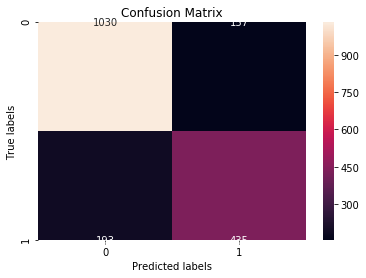

In [41]:
ax= plt.subplot()
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(cm, annot=True, ax = ax,fmt="d",annot_kws=akws); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [42]:
cm

array([[1030,  157],
       [ 193,  435]], dtype=int64)

We are now able to predict the hot leads with approx 80% accuracy.